## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
data = pd.concat(map(pd.read_csv, [('dataset{}.csv').format(i) for i in range(1,6)]),
                 ignore_index=True)

In [3]:
data.columns=['titolo', 'durata', 'views', 'n_comments', 'n_like', 'genere',
       'views.1', 'FF', 'paid', 'publ', 'max_quality']

In [4]:
#droppa colonna doppia
data=data.drop('views.1', axis=1)

In [5]:
#cast dtypes for columns
data['views']=data['views'].replace(" NA", np.nan).astype('Int64')
data['durata']=data['durata'].replace(" NA", np.nan).astype('Int64')
data['FF']=data['FF'].replace(" NA", np.nan).astype('bool')
data['paid']=data['paid'].replace(" NA", np.nan).astype('bool')
data['publ']=data['publ'].replace(" NA", np.nan).astype('datetime64[ns]')
data['max_quality']=data['max_quality'].replace(" None", np.nan).astype('Int64')
data['genere']=data['genere'].replace(" NA", np.nan)

In [6]:
data.dtypes

titolo                 object
durata                  Int64
views                   Int64
n_comments              int64
n_like                  int64
genere                 object
FF                       bool
paid                     bool
publ           datetime64[ns]
max_quality             Int64
dtype: object

In [7]:
# tutti i paid e gli ff sono true-> no info -> butto tutto
data['paid'].sum()==data['paid'].sum()==len(data)
data=data.drop(['FF','paid'], axis=1)

In [8]:
#find rows with all missing values
selected_rows = data[data[['titolo', 'durata', 'views', 'genere', 
                          'publ', 'max_quality']].isna().all(axis=1)]
data=data.drop(selected_rows.index)

In [9]:
#no double rows
data.duplicated().sum()

0

In [10]:
data

,titolo,durata,views,n_comments,n_like,genere,publ,max_quality
0,Сокровища пиратов уровень 958 прохождение на т...,171,57650,12,27,Gaming,2014-08-22,5
1,Spyder's Uncharted 3 Experience Part 1,283,21421,114,306,People & Blogs,2012-05-14,5
2,Arisxandra Libantino - I Have Nothing (Whitney...,133,13200,1,105,Entertainment,2013-07-10,5
3,DiMarzio Illuminator com John Petrucci,305,1948,0,10,Music,2015-04-27,6
5,HRSportDE | EURO 2012: Slaven Bilic im Interview,203,2383,0,3,Science & Technology,2012-06-05,3
...,...,...,...,...,...,...,...,...
4505,compostage de fumier avec xerion 2500,440,4133,0,4,People & Blogs,2012-07-20,5
4506,Lançamento da embarcação Siem Giant *********...,91,3772,0,14,People & Blogs,2013-09-06,4
4507,Anti-Eyebrow Surface Piercing,155,18061,6,18,Howto & Style,2009-09-06,3
4508,Carvin DC727 Review,195,1549,11,10,Gaming,2011-12-31,4


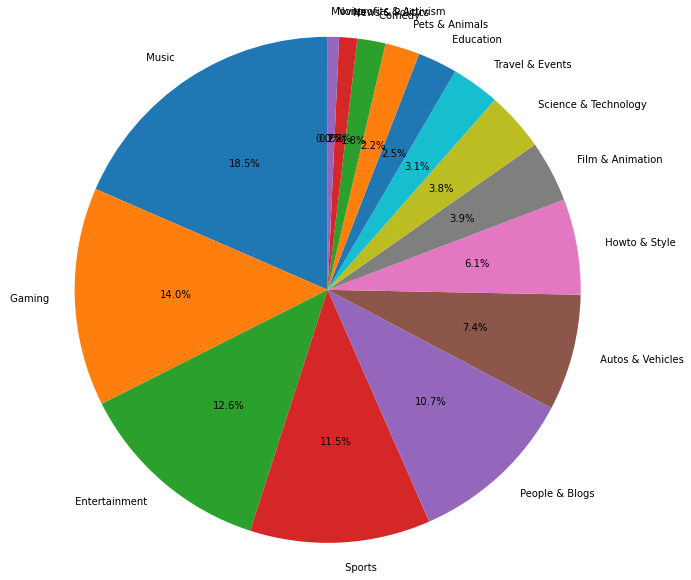

In [11]:
# Pie chart for genres
labels = data['genere'].value_counts().index
sizes = data['genere'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal') 

plt.show()

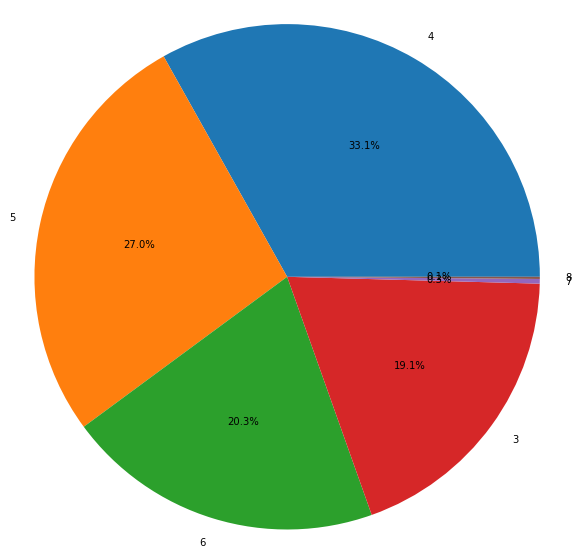

In [12]:
# Pie chart for max_quality
labels = data['max_quality'].value_counts().index
sizes = data['max_quality'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

In [13]:
sizes

4    0.328446
5    0.267539
6    0.201444
3    0.189714
7    0.002933
8    0.001353
Name: max_quality, dtype: Float64